### README.MD

### what decides bitcoin price:
 The supply of Bitcoin and the market's demand for it
 The cost of producing a bitcoin through the mining process
The rewards issued to Bitcoin miners for verifying transactions to the blockchain
The number of competing cryptocurrencies
Regulations governing its sale and use and the state of its internal governance
News developments

Technical Analysis Indicators in Pandas
https://towardsdatascience.com/trading-technical-analysis-with-pandas-43e737a17861
Bollinger Bands is used to define the prevailing high and low prices in a market to 
characterize the trading band of a financial instrument or commodity. Bollinger Bands are 
a volatility indicator. Bands are consists of Moving Average (MA) line, a upper band and lower 
band. The upper and lower bands are simply MA adding and subtracting standard deviation. Standard 
deviation is a measurement of volatility. That’s why it’s a volatility indictor. 
Upper Band = (MA + Kσ)
Lower Band = (MA − Kσ)
MA =20 K = 2


Becoming Trader Data Scientist:
https://medium.com/coinmonks/becoming-a-trader-data-scientist-transforming-bollinger-bands-part-4-8aab6fbc2f2d



In [2]:
import pandas as pd
# import streamlit as st
from datetime import date

import yfinance as yf
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly
from plotly import graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import IPython
import IPython.display
%matplotlib inline

import tensorflow as tf
print("tf.__version__:", tf.__version__)
import tensorflow.keras as keras
print("keras.__version__:", keras.__version__)

tf.__version__: 2.5.1
keras.__version__: 2.5.0


In [3]:
df = pd.read_pickle('./bitcoin_etl.pk1')
#df_csv = pd.read_csv('bitcoin_etl.csv')
df

,Open,High,Low,Close,Volume,ETH-USDOpen,ETH-USDHigh,ETH-USDLow,ETH-USDClose,BNB-USDOpen,...,day sin,day cos,week sin,week cos,Increase_in_vol,Increase_in_adj_close,candle_wick,candle_body,candle_shape,candle_color
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-09-10 00:00:00+01:00,46514.476562,46528.984375,46488.984375,46528.984375,3694592,3449.537598,3457.268311,3448.301514,3457.268311,422.671783,...,-0.258819,0.965926,0.757972,0.652287,0.0,0.000000,40.000000,14.507812,-12.746094,0
2021-09-10 00:05:00+01:00,46538.707031,46596.960938,46538.707031,46596.960938,3694592,3459.072021,3463.422607,3458.993896,3463.422607,423.838776,...,-0.237686,0.971342,0.760001,0.649922,0.0,67.976562,58.253906,58.253906,0.000000,0
2021-09-10 00:10:00+01:00,46600.589844,46626.742188,46578.835938,46626.742188,3694592,3464.790771,3467.063721,3462.626953,3466.461914,424.008026,...,-0.216440,0.976296,0.762023,0.647550,0.0,29.781250,47.906250,26.152344,-10.876953,0
2021-09-10 00:15:00+01:00,46615.437500,46615.437500,46550.089844,46550.089844,3985408,3463.465576,3463.465576,3454.748779,3454.748779,424.505554,...,-0.195090,0.980785,0.764037,0.645172,290816.0,-76.652344,65.347656,65.347656,0.000000,1
2021-09-10 00:20:00+01:00,46557.332031,46560.378906,46542.398438,46560.378906,3985408,3454.510498,3454.510498,3452.857666,3453.402100,423.209167,...,-0.173648,0.984808,0.766044,0.642788,0.0,10.289062,17.980469,3.046875,-7.466797,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08 22:50:00+00:00,66475.351562,66503.812500,66475.351562,66502.156250,71376896,4776.314453,4778.503906,4773.888184,4778.503906,651.252563,...,-0.300706,0.953717,-0.964294,-0.264835,-1781760.0,41.375000,28.460938,26.804688,0.828125,0
2021-11-08 22:55:00+00:00,66501.796875,66558.718750,66501.796875,66530.773438,95301632,4778.770996,4781.055664,4778.416992,4779.309082,651.557556,...,-0.279829,0.960050,-0.965114,-0.261828,23924736.0,28.617188,56.921875,28.976562,13.972656,0
2021-11-08 23:00:00+00:00,66544.054688,66544.054688,66432.781250,66457.882812,10588160,4781.719238,4781.719238,4769.976562,4769.976562,652.362061,...,-0.258819,0.965926,-0.965926,-0.258819,-84713472.0,-72.890625,111.273438,86.171875,-12.550781,1


In [5]:
# check the Date column type
df.index.dtype

datetime64[ns, Europe/London]

### Candlestick Prediction

In [ ]:
#!pip install --user shap

In [259]:
import matplotlib
import numpy as np
import pandas as pd
import itertools
import sklearn
import keras
import time
import shap


from keras.models import Sequential
from keras.layers import Dense, Dropout, CuDNNLSTM, Conv1D
from matplotlib import pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc


print('Numpy version: ' + np.__version__)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
print('Sklearn version: ' + sklearn.__version__)
print('Keras version: ' + keras.__version__)

Numpy version: 1.19.5
Pandas version: 1.2.4
Matplotlib version: 3.3.4
Sklearn version: 0.24.1
Keras version: 2.5.0


#### Class object to measure time

In [260]:
class MeasureTime:
    def __init__(self):
        self.start = time.time()
    def kill(self):
        print ('Time elapsed: ' + time.strftime("%H:%M:%S", time.gmtime(time.time()-self.start)))
        del self

In [261]:
Notebook_timer = MeasureTime()

In [262]:
Notebook_timer.kill()

Time elapsed: 00:00:00


#### Function to plot OHLC candlestick data in to chart

In [263]:
my_dataset = df[['Open','High','Low','Close']]

In [264]:
def graph_data_ohlc(dataset):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    closep=dataset[:,[3]]
    highp=dataset[:,[1]]
    lowp=dataset[:,[2]]
    openp=dataset[:,[0]]
    date=range(len(closep))

    x = 0
    y = len(date)
    ohlc = []
    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x]
        ohlc.append(append_me)
        x+=1
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    plt.xlabel('Candle')
    plt.ylabel('Price')
    plt.title('Bitcoin Price (USD)')

    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

#### Visualize 1000 candlesticks on the OHLC chart in one time

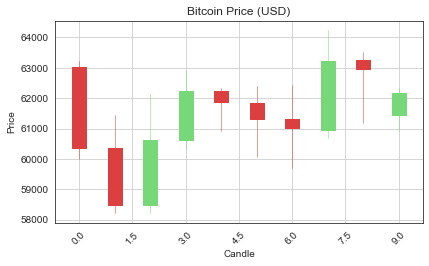

In [266]:
graph_data_ohlc(my_dataset.tail(10).values)

#### 1.2 - Converting data to time series format
#### Custom generator function to create 3d arrays of candles sequence

In [267]:
def my_generator(data,lookback):
    final_output = []
    counter = 0
    first_row = 0
    arr = np.empty((1,lookback,4), int)
    for a in range(len(data)-lookback):
        temp_list = []
        for candle in data[first_row:first_row+lookback]:
            temp_list.append(candle)
        temp_list2 = np.asarray(temp_list)
        templist3 = [temp_list2]
        templist4 = np.asarray(templist3)
        arr = np.append(arr, templist4, axis=0)
        first_row=first_row+1
    return arr

In [268]:
cell_timer = MeasureTime()
three_dim_sequence = np.asarray(my_generator(my_dataset.values[1:],3))
cell_timer.kill()

Time elapsed: 00:00:00


In [269]:
three_dim_sequence.shape

(2549, 3, 4)

Step 1


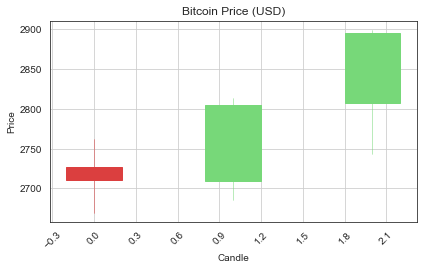

Step 2


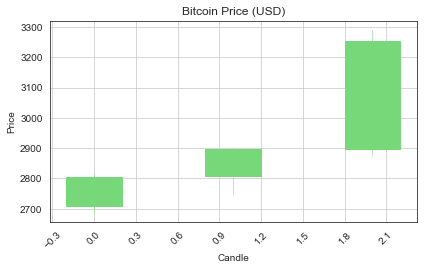

Step 3


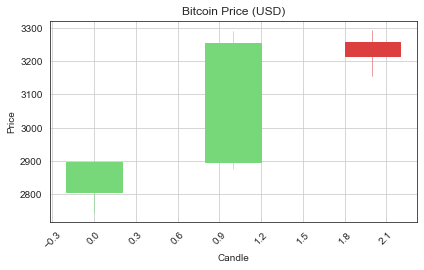

Step 4


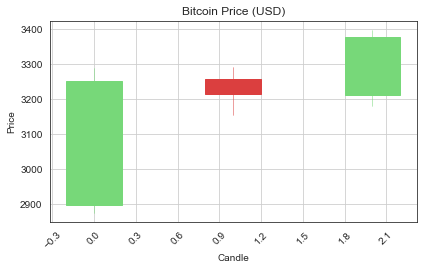

Step 5


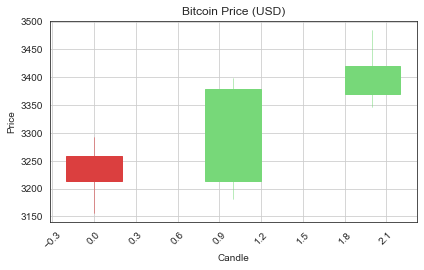

In [270]:
# visualize the step by step sequency of price movements on the OHLC chart
counter=0
for candle in three_dim_sequence[1000:1005]:
    counter=counter+1
    print('Step ' + str(counter))
    graph_data_ohlc(candle)

#### Function to convert OHLC data in to candlestick parameters data

In [271]:
def ohlc_to_candlestick(conversion_array):
    candlestick_data = [0,0,0,0]

    if conversion_array[3]>conversion_array[0]:
        candle_type=1
        wicks_up=conversion_array[1]-conversion_array[3]
        wicks_down=conversion_array[2]-conversion_array[0]
        body_size=conversion_array[3]-conversion_array[0]

    else:
        candle_type=0
        wicks_up=conversion_array[1]-conversion_array[0]
        wicks_down=conversion_array[2]-conversion_array[3]
        body_size=conversion_array[1]-conversion_array[3]


    if wicks_up < 0:wicks_up=wicks_up*(-1)
    if wicks_down < 0:wicks_down=wicks_down*(-1)
    if body_size < 0:body_size=body_size*(-1)
    candlestick_data[0]=candle_type
    candlestick_data[1]=round(round(wicks_up,5)*10000,2)
    candlestick_data[2]=round(round(wicks_down,5)*10000,2)
    candlestick_data[3]=round(round(body_size,5)*10000,2)

    return candlestick_data

In [272]:
#extract data of only one candle from our dataset of sequences
cell_timer = MeasureTime()
one_candle_data_ohlc=three_dim_sequence[1000:1010][5][1]
cell_timer.kill()

Time elapsed: 00:00:00


In [273]:
one_candle_data_ohlc

array([3370.2199707 , 3484.85009766, 3345.83007812, 3419.93994141])

In [274]:
#Convert it to candlestick parameters
one_candle_data_ohlc_candle=ohlc_to_candlestick(one_candle_data_ohlc)

In [275]:
one_candle_data_ohlc_candle

[1, 649101.6, 243898.9, 497199.7]

#### Apply this function in to generator function to get sequences with candlestick data instead of OHLC data

In [276]:
def my_generator_candle(data,lookback):
    first_row = 0
    arr = np.empty((1,lookback,4), int)
    for a in range(len(data)-lookback):
        temp_list = []
        for candle in data[first_row:first_row+lookback]:
            converted_data = ohlc_to_candlestick(candle)
            temp_list.append(converted_data)
        temp_list2 = np.asarray(temp_list)
        templist3 = [temp_list2]
        templist4 = np.asarray(templist3)
        arr = np.append(arr, templist4, axis=0)
        first_row=first_row+1
    return arr

In [277]:
#Get the get the data in form of sequences made from last 3 candles
three_dim_sequence_candle=my_generator_candle(my_dataset.values[1:],3)

In [278]:
#Check if conversion applied correctly
three_dim_sequence_candle[5000:5005]

array([], shape=(0, 3, 4), dtype=float64)

#### Generate the forcasting data
#### Update of the generator to return one more array with 1 or 0 (Bullish or Bearish)

In [ ]:
def my_generator_candle_X_Y(data,lookback,MinMax = False):
    if MinMax==True:scaler = preprocessing.MinMaxScaler()
    first_row = 0
    arr = np.empty((0,lookback,4))
    arr3 = np.empty((0,lookback,4))
    Y_list = []
    for a in range(len(data)-lookback):
        temp_list = []
        temp_list_raw = []
        for candle in data[first_row:first_row+lookback]:
            converted_data = ohlc_to_candlestick(candle)
            temp_list.append(converted_data)
            temp_list_raw.append(candle)
        temp_list3 = [np.asarray(temp_list)]
        templist4 = np.asarray(temp_list3)

        if MinMax==True:
            templist99 = scaler.fit_transform(templist4[0])
            arr = np.append(arr, [templist99], axis=0)
        else:
            arr = np.append(arr, templist4, axis=0)

        temp_list7 = [np.asarray(temp_list_raw)]
        templist8 = np.asarray(temp_list7)
        arr3 = np.append(arr3, templist8, axis=0)

        converted_data_prediction = ohlc_to_candlestick(data[first_row+lookback])
        Prediction = converted_data_prediction[0]
        Y_list.append(Prediction)

        first_row=first_row+1

    arr2 = np.asarray(Y_list)

    return arr,arr2,arr3

#### We will call the function and receive 2 datasets:
X = Input dataset on which our neural network will make predictions

Y = Prediction dataset (results of the correct predictions)

In [ ]:
cell_timer = MeasureTime()
X,Y, X_raw = my_generator_candle_X_Y(my_dataset.values,3,MinMax=False)
cell_timer.kill()

In [ ]:
# explore the dataset
print('Shape of X ' + str(X.shape))
print('Shape of Y ' + str(Y.shape))
print('Shape of X raw ohlc ' + str(X_raw.shape))

In [ ]:
X[653]

In [ ]:
Y[653]

In [ ]:
X_raw[653]

In [ ]:
# how many bullish and bearish predictions?
unique, counts = np.unique(Y, return_counts=True)
predictions_type = dict(zip(unique, counts))
print('Bull: ' + str((predictions_type[1])) + ' percent: ' + str(round((predictions_type[1]*100)/len(Y),2)) + '%')
print('Bear: ' + str((predictions_type[0])) + ' percent: ' + str(round((predictions_type[0]*100)/len(Y),2)) + '%')
print('Total: ' + str(len(Y)))

In [ ]:
for a in range(5):
    b=a+1000
    if Y[b] == 1:print('Correct prediction would be Bullish ---^')
    if Y[b] == 0:print('Correct prediction would be Bearish ---v')
    graph_data_ohlc(X_raw[b])

#### BUild the Deep Learning model (vLSTM xRNN)

In [ ]:
from keras import layers
#from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.CuDNNLSTM(units = 12,return_sequences=True, input_shape = (None, X.shape[-1])))
model.add(layers.CuDNNLSTM(units = 24))
model.add(layers.Dense(units = 1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

#### In order train the deep learning model we need to split our data for 3 parts:
1.Traning dataset
2. Validation dataset
3. Test dataset

In [ ]:
cell_timer = MeasureTime()
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.5)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

X_train_raw, X_val_and_test_raw= train_test_split(X_raw, test_size=0.5)
X_val_raw, X_test_raw = train_test_split(X_val_and_test_raw, test_size=0.5)
cell_timer.kill()

In [ ]:
print('Training data: ' + 'X Input shape: ' + str(X_train.shape) + ', ' + 'Y Output shape: ' + str(Y_train.shape) + ', ' + 'datetime shape: ' + str(Y_train.shape))
print('Validation data: ' + 'X Input shape: ' + str(X_val.shape) + ', ' + 'Y Output shape: ' + str(Y_val.shape) + ', ' + 'datetime shape: ' + str(Y_val.shape))
print('Test data: ' + 'X Input shape: ' + str(X_test.shape) + ', ' + 'Y Output shape: ' + str(Y_test.shape) + ', ' + 'datetime shape: ' + str(Y_test.shape))

In [ ]:
cell_timer = MeasureTime()
history = model.fit(X_train, Y_train,batch_size=500, epochs=13,validation_data=(X_val, Y_val))
cell_timer.kill()

In [ ]:
# new Open  =  previous  close

# new high  = image classification
# new low   =  image classification 
# new close = to be predicted  (image classification + machine learning)    bullish or bearish, candle body size





### Split the data

In [6]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

### Normalize the data

In [7]:
train_mean = train_df.mean()                          
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std    

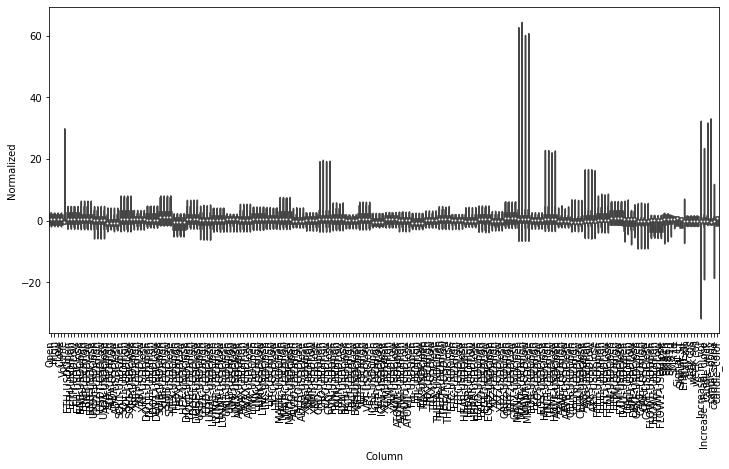

In [8]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [131]:
# this the final dataframe fed into the machine
df

,Open,High,Low,Close,Volume,upper_band,lower_band,SMA5,SMA10,SMA20,...,Year sin,Year cos,Period sin,Period cos,Increase_in_vol,Increase_in_adj_close,candle_wick,candle_body,candle_shape,candle_color
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-06,339.458008,352.966003,338.424011,349.290009,18797000,398.115063,309.933936,334.542798,337.529800,354.024500,...,-0.372488,-0.928037,0.636519,-0.771261,-1.020200e+06,9.804016,14.541992,9.832001,1.320999,0
2014-11-07,349.817993,352.731995,341.776001,342.415009,16834200,392.221641,310.924660,337.847400,336.009500,351.573151,...,-0.388650,-0.921386,0.633143,-0.774035,-1.962800e+06,-6.875000,10.955994,7.402985,1.137497,1
2014-11-08,342.153992,347.032013,342.153992,345.488007,8535470,385.922913,312.817590,341.434204,336.999200,349.370251,...,-0.404692,-0.914453,0.629755,-0.776794,-8.298730e+06,3.072998,4.878021,3.334015,0.772003,0
2014-11-09,345.376007,363.626007,344.255005,363.264008,24205600,382.107567,314.674837,347.988605,338.795102,348.391202,...,-0.420611,-0.907241,0.626355,-0.779538,1.567013e+07,17.776001,19.371002,17.888000,-0.379501,0
2014-11-10,362.265015,374.816010,357.561005,366.924011,30450100,377.409248,317.418056,353.476208,341.655402,347.413652,...,-0.436401,-0.899752,0.622943,-0.782267,6.244500e+06,3.660004,17.255005,4.658997,1.593994,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,61850.488281,62406.171875,60074.328125,61318.957031,32241199927,65681.335136,56344.176583,60908.055469,61096.061328,61012.755859,...,-0.831712,-0.555207,0.857785,0.514009,8.326131e+07,-569.875000,2331.843750,531.531250,-344.472656,1
2021-11-01,61320.449219,62419.003906,59695.183594,61004.406250,36150572843,65302.283336,57219.563148,61412.459375,61127.275391,61260.923242,...,-0.841288,-0.540587,0.860022,0.510256,3.909373e+09,-314.550781,2723.820312,316.042969,-105.333984,1
2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,37746665647,65247.076980,57857.299973,61933.312500,61310.553906,61552.188477,...,-0.850607,-0.525803,0.862244,0.506494,1.596093e+09,2221.996094,3569.738281,2263.148438,363.095703,0


### CNN & RNN 
### Data windowing

In [69]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [133]:
# # to make a single prediction 50d into the future, given 50d of history you might define a window like this:
# w1 = WindowGenerator(input_width=50, label_width=50, shift=1,
#                       label_columns=['Close'])
# w1

In [70]:
#A model that makes a prediction 1d into the future, given 5d of history would need a window like this:

w2 = WindowGenerator(input_width=864, label_width=864, shift=864,
                     label_columns=['Close'])
w2

Total window size: 1728
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236

### split

In [71]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [72]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 1728, 202)
Inputs shape: (3, 864, 202)
labels shape: (3, 864, 1)


### plot

In [73]:
w2.example = example_inputs, example_labels

In [74]:
def plot(self, model=None, plot_col='Close', max_subplots=3):
  inputs, labels = self.example

  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
#  max_n = min(max_subplots, int(inputs.shape[0]))    
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
#     plt.plot(self.input_indices, inputs[n, :, plot_col_index],
#              label='Inputs', marker='.', zorder=-10)
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    
    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [day??]')

WindowGenerator.plot = plot

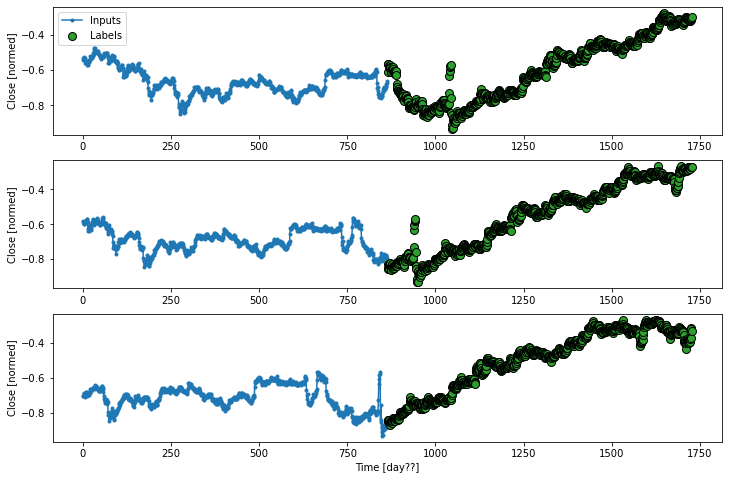

In [75]:
w2.plot()

In [76]:
def plot(self, model=None, plot_col='Close', max_subplots=3):
  inputs, labels = self.example

  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
#  max_n = min(max_subplots, int(inputs.shape[0]))    
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
#     plt.plot(self.input_indices, inputs[n, :, plot_col_index],
#              label='Inputs', marker='.', zorder=-10)
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    
    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [day]')

WindowGenerator.plot = plot

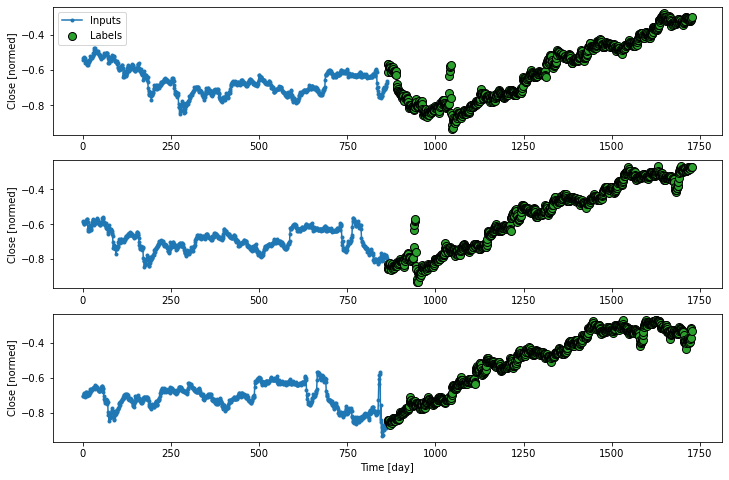

In [77]:
w2.plot()

### Create tf.data.Datasets¶

In [78]:
def make_dataset(self, data):
  #print(self)
  #print(data)
  data = np.array(data, dtype=np.float32)
  #print(data)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)                    ## original batch size =32
#      batch_size=128)                   ## test batch size = 64, could try 128 or larger in Apache Spark

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [79]:
@property
def train(self):
  #print(self.train_df)
  #self.make_dataset(self.train_df)
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [80]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 864, 202), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 864, 1), dtype=tf.float32, name=None))

In [81]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 864, 202)
Labels shape (batch, time, features): (32, 864, 1)


### single step models

In [82]:
single_step_window = WindowGenerator(
    input_width=864, label_width=864, shift=864,
    label_columns=['Close'])
single_step_window

Total window size: 1728
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236

In [83]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 864, 202)
Labels shape (batch, time, features): (32, 864, 1)


### Baseline

In [84]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [85]:
baseline = Baseline(label_index=column_indices['Close'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

55/55 [==============================] - 2s 26ms/step - loss: 0.0684 - mean_absolute_error: 0.2275


In [86]:
wide_window = WindowGenerator(
#    input_width=24, label_width=24, shift=1,
    input_width=864, label_width=864, shift=864,
    label_columns=['Close'])

wide_window

Total window size: 1728
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236

In [87]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 864, 202)
Output shape: (32, 864, 1)


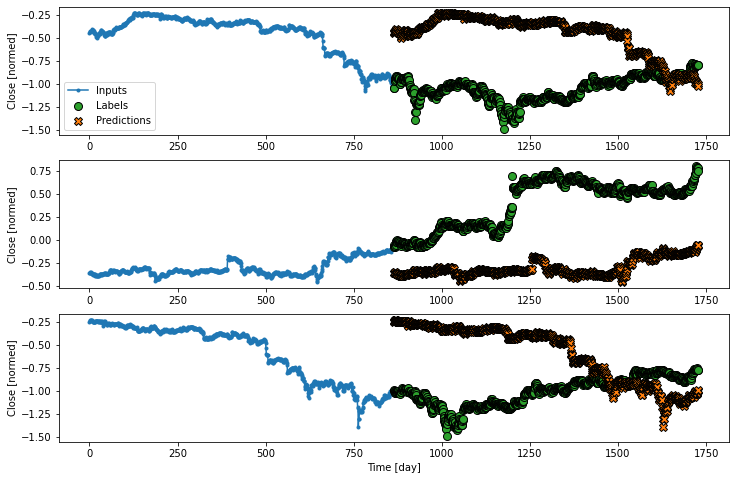

In [88]:
wide_window.plot(baseline)

### Convolution neural network
A convolution layer (layers.Conv1D) also takes multiple time steps as input to each prediction.

Below is the same model as multi_step_dense, re-written with a convolution.

Note the changes:

The layers.Flatten and the first layers.Dense are replaced by a layers.Conv1D.
The layers.Reshape is no longer necessary since the convolution keeps the time axis in its output.

In [94]:
MAX_EPOCHS = 50                                               # This is for non-Apache-Spark run
#MAX_EPOCHS = 50                                               # Epochs number is further increased to enhance models' performence, however seems end up with over fitting, giving a higher mae in test_set
#MAX_EPOCHS = 2000                                             # Apach Spark gives loss-nan and val-nan (barger batch size and smaller feature size is required ... )


def compile_and_fit(model, window, patience=2):               # patience is important feature to control the simulation time by terminate it early, 
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='auto')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [95]:
CONV_WIDTH = 864                    # was 3 for 3h as input, now is SMA days as input
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=864,                  
    shift=864,                        # was 1 for 1h into the future, now is 1 day into the future
    label_columns=['Close'])

conv_window

Total window size: 1728
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236

In [96]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [97]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 864, 202)
Output shape: (32, 1, 1)


In [98]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

55/55 [==============================] - 2s 29ms/step - loss: nan - mean_absolute_error: nan: 1s - loss: nan - mean_ab


In [173]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 50, 30)
Labels shape: (32, 50, 1)
Output shape: (32, 1, 1)


In [174]:
LABEL_WIDTH = 864
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=864,
    label_columns=['Close'])

wide_conv_window

Total window size: 149
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]
Label indices: [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148]
Label column name(s): ['Close']

In [175]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 99, 30)
Labels shape: (32, 50, 1)
Output shape: (32, 50, 1)


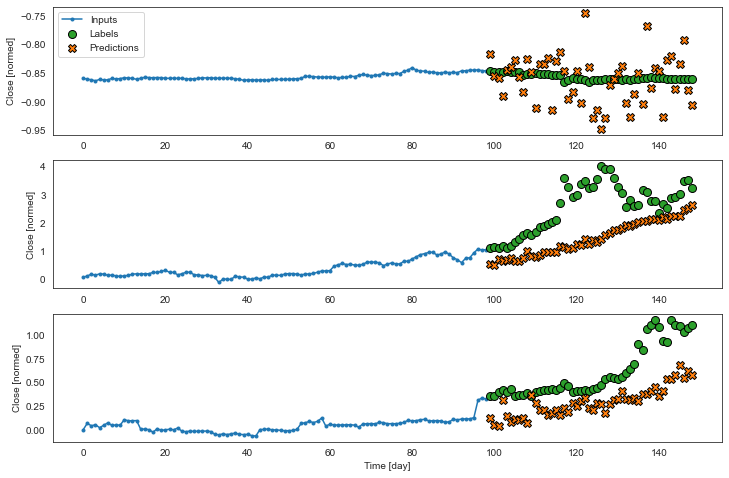

In [176]:
wide_conv_window.plot(conv_model)

### Performance check

In [161]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Close, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

NameError: name 'lstm_model' is not defined

### Save the model to h5

In [ ]:
model.save('path/to/location')